In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Get the historical data of BRIS

In [ ]:
# giving the start and end dates
startDate = '2023-09-22'
endDate = '2024-02-22'

ticker = 'BRIS.JK'

In [ ]:
df = yf.download(ticker,startDate,endDate)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-22,1650.0,1670.0,1630.0,1640.0,1640.0,28776400
2023-09-25,1640.0,1650.0,1615.0,1620.0,1620.0,22654100
2023-09-26,1620.0,1635.0,1600.0,1605.0,1605.0,28585900
2023-09-27,1615.0,1640.0,1610.0,1615.0,1615.0,21738200
2023-09-29,1620.0,1630.0,1605.0,1625.0,1625.0,14792200
...,...,...,...,...,...,...
2024-02-15,2400.0,2450.0,2380.0,2390.0,2390.0,74108800
2024-02-16,2390.0,2410.0,2310.0,2330.0,2330.0,39394100
2024-02-19,2330.0,2410.0,2290.0,2380.0,2380.0,49202700


# Create MA 5, 10, 20, 50

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df_short_term = pd.DataFrame(df['Close'])
df_short_term

,Close
Date,
2023-09-22,1640.0
2023-09-25,1620.0
2023-09-26,1605.0
2023-09-27,1615.0
2023-09-29,1625.0
...,...
2024-02-15,2390.0
2024-02-16,2330.0
2024-02-19,2380.0


In [ ]:
df_short_term.columns

Index(['Close'], dtype='object')

In [ ]:
df_short_term['SMA5'] = df_short_term['Close'].rolling(5).mean()
df_short_term['SMA10'] = df_short_term['Close'].rolling(10).mean()
df_short_term['SMA20'] = df_short_term['Close'].rolling(20).mean()
df_short_term['SMA50'] = df_short_term['Close'].rolling(50).mean()

In [ ]:
df_short_term

,Close,SMA5,SMA10,SMA20,SMA50
Date,,,,,
2023-09-22,1640.0,NaN,NaN,NaN,NaN
2023-09-25,1620.0,NaN,NaN,NaN,NaN
2023-09-26,1605.0,NaN,NaN,NaN,NaN
2023-09-27,1615.0,NaN,NaN,NaN,NaN
2023-09-29,1625.0,1621.0,NaN,NaN,NaN
...,...,...,...,...,...
2024-02-15,2390.0,2356.0,2322.0,2180.75,1931.9
2024-02-16,2330.0,2360.0,2337.0,2200.75,1945.4
2024-02-19,2380.0,2364.0,2342.0,2222.25,1959.5


In [ ]:
df_short_term.columns

Index(['Close', 'SMA5', 'SMA10', 'SMA20', 'SMA50'], dtype='object')

#EDA

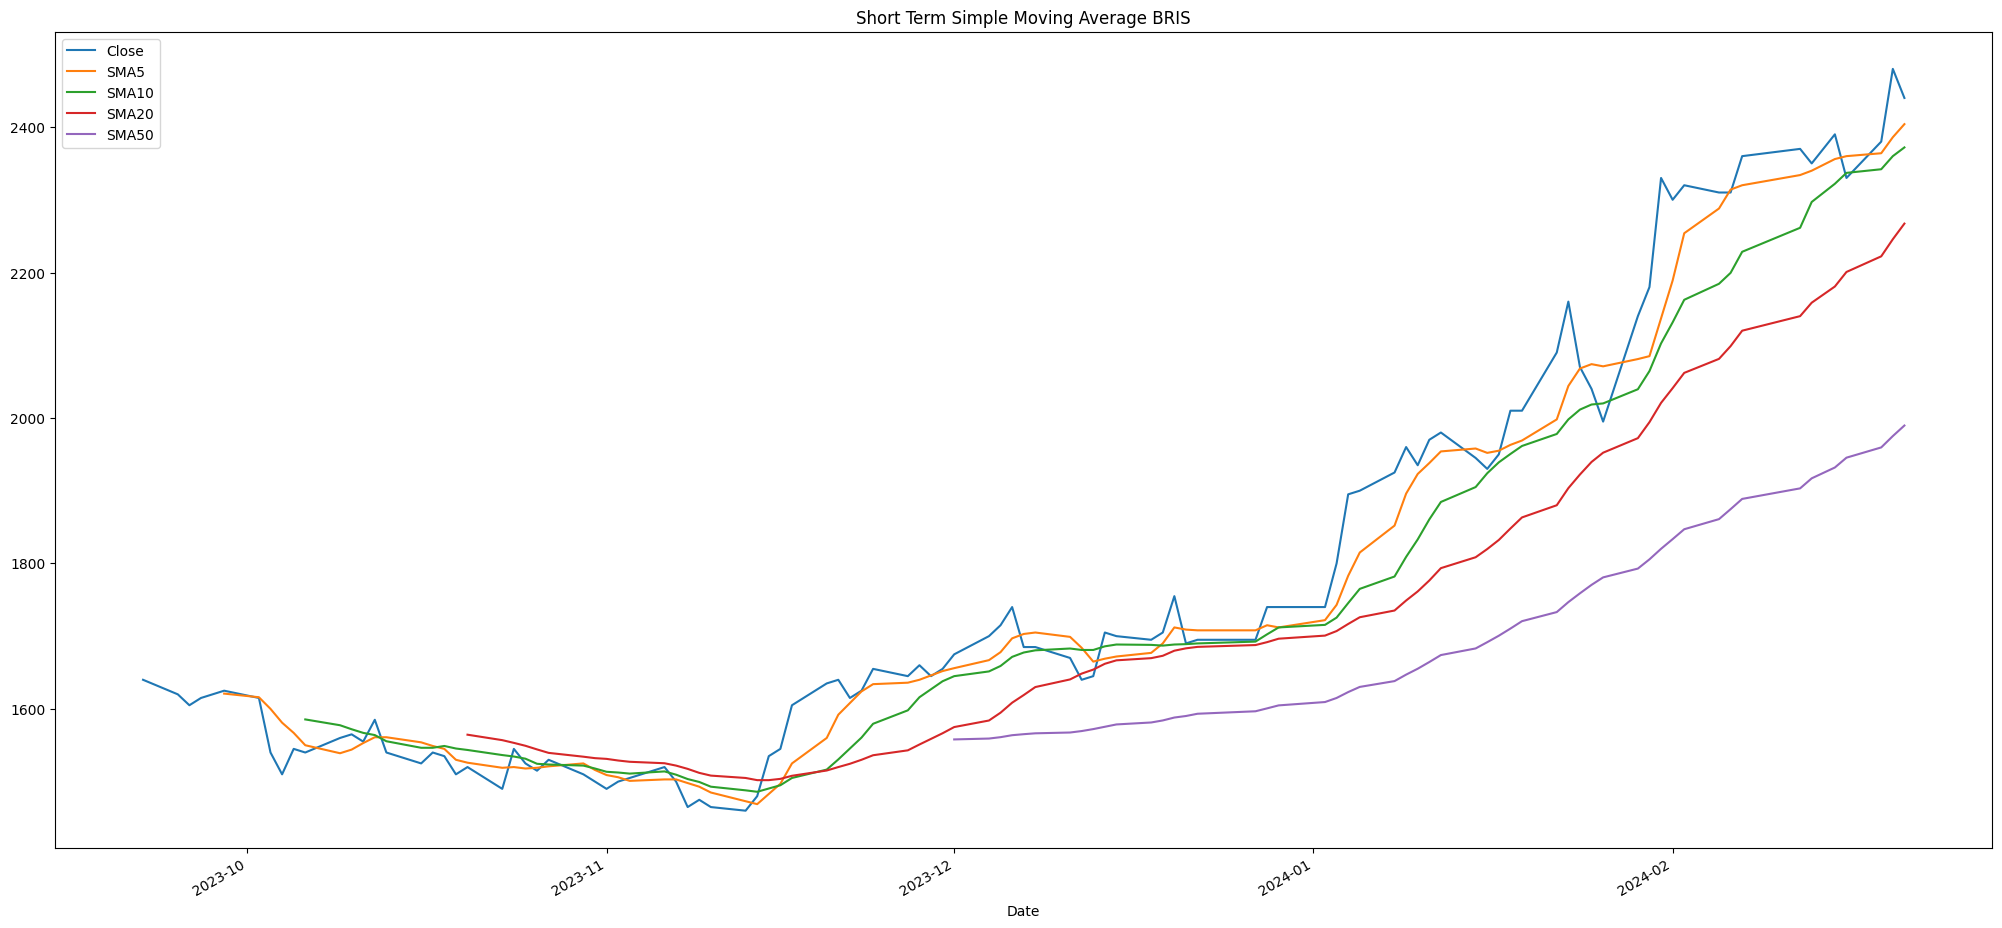

In [ ]:
df_short_term['Close'].plot(kind = 'line', figsize = (25,12))
df_short_term['SMA5'].plot(kind = 'line', figsize = (25,12))
df_short_term['SMA10'].plot(kind = 'line', figsize = (25,12))
df_short_term['SMA20'].plot(kind = 'line', figsize = (25,12))
df_short_term['SMA50'].plot(kind = 'line', figsize = (25,12), title = 'Short Term Simple Moving Average BRIS')
plt.legend(['Close', 'SMA5', 'SMA10', 'SMA20', 'SMA50'], loc="upper left")



1.   Terlihat bahwa SMA50 lumayan jauh dari harga asli.
2.   SMA20 tampak menjadi resistance hingga akhirnya crossing dan berubah menjadi support. Akan tetapi, SMA20 semakin menjauhi harga asli.
3. SMA10 menjadi resistance dan support yang cukup kuat, walaupun terjadi beberapa crossing, akan tetapi masih dalam batas error.
4. Untuk SMA5 sendiri hampir sama dengan SMA10, akan tetapi lebih baik menggunakan SMA10. Akan tetapi, SMA5 mungkin memiliki error yang lebih baik daripada SMA10.



# Error SMA5

In [ ]:
df_sma5 = pd.DataFrame(df_short_term['Close'])
df_sma5['SMA5'] = df_short_term['SMA5']
df_sma5

,Close,SMA5
Date,,
2023-09-22,1640.0,NaN
2023-09-25,1620.0,NaN
2023-09-26,1605.0,NaN
2023-09-27,1615.0,NaN
2023-09-29,1625.0,1621.0
...,...,...
2024-02-15,2390.0,2356.0
2024-02-16,2330.0,2360.0
2024-02-19,2380.0,2364.0


$Error = Observation - Forecast$

In [ ]:
df_sma5 = df_sma5.dropna()
df_sma5['error'] = df_sma5['Close'] - df_sma5['SMA5']
df_sma5

<ipython-input-141-f747773e2e4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sma5['error'] = df_sma5['Close'] - df_sma5['SMA5']


,Close,SMA5,error
Date,,,
2023-09-29,1625.0,1621.0,4.0
2023-10-02,1615.0,1616.0,-1.0
2023-10-03,1540.0,1600.0,-60.0
2023-10-04,1510.0,1581.0,-71.0
2023-10-05,1545.0,1567.0,-22.0
...,...,...,...
2024-02-15,2390.0,2356.0,34.0
2024-02-16,2330.0,2360.0,-30.0
2024-02-19,2380.0,2364.0,16.0


In [ ]:
df_sma5_fix = df_sma5.reset_index()
df_sma5_fix

,Date,Close,SMA5,error
0,2023-09-29,1625.0,1621.0,4.0
1,2023-10-02,1615.0,1616.0,-1.0
2,2023-10-03,1540.0,1600.0,-60.0
3,2023-10-04,1510.0,1581.0,-71.0
4,2023-10-05,1545.0,1567.0,-22.0
...,...,...,...,...
93,2024-02-15,2390.0,2356.0,34.0
94,2024-02-16,2330.0,2360.0,-30.0
95,2024-02-19,2380.0,2364.0,16.0
96,2024-02-20,2480.0,2386.0,94.0


It works by accumulating deviations of the forecast errors that are above the desired target value **$T$** **(usually either zero or the average forecast error)** with one statistic $c^+$ and deviations that are below the target with another statistic $c^-$. The statistics $c^+$ and $c^-$ are called the upper and lower CUSUMs, respectively. They are computed as follows:


> $C_t^+ = max[0, e_t(1)- (T + K) + C^+_{t-1} ]$

> $C_t^- = min[0, e_t(1)- (T - K) + c^-_{t-1}]$

where the constant $K$. usually called the **reference value** is usually chosen as $K = 0.5\sigma_{e_{(1)}}$ and $\sigma_{e_{(1)}}$ is the standard deviation of the one-step-ahead forecast errors.





In [ ]:
T = df_sma5_fix['error'].mean()

In [ ]:
K = 0.5*df_sma5_fix['error'].std()

A common method of calculating control limits is the mean +/- three standard deviations.

In [ ]:
UCL = T + 3*K
LCL = T - 3*K

In [ ]:
df_sma5_fix['C_plus'] = 0
df_sma5_fix['C_min'] = 0
df_sma5_fix['C'] = 0

In [ ]:
for i in range(1,98):
  df_sma5_fix['C_plus'][i] = max(0, df_sma5_fix['error'][i] - (T+K) +  df_sma5_fix['C_plus'][i-1])
  df_sma5_fix['C_min'][i] = min(0, df_sma5_fix['error'][i] - (T-K) +  df_sma5_fix['C_min'][i-1])
  df_sma5_fix['C'][i] = df_sma5_fix['C_plus'][i] + df_sma5_fix['C_min'][i]

<ipython-input-146-4dd75ccbeeac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sma5_fix['C_plus'][i] = max(0, df_sma5_fix['error'][i] - (T+K) +  df_sma5_fix['C_plus'][i-1])
<ipython-input-146-4dd75ccbeeac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sma5_fix['C_min'][i] = min(0, df_sma5_fix['error'][i] - (T-K) +  df_sma5_fix['C_min'][i-1])
<ipython-input-146-4dd75ccbeeac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d

In [ ]:
df_sma5_fix['UCL'] = UCL
df_sma5_fix['LCL'] = LCL
df_sma5_fix

,Date,Close,SMA5,error,C_plus,C_min,C,UCL,LCL
0,2023-09-29,1625.0,1621.0,4.0,0.000000,0.000000,0.000000,80.565129,-47.361047
1,2023-10-02,1615.0,1616.0,-1.0,0.000000,0.000000,0.000000,80.565129,-47.361047
2,2023-10-03,1540.0,1600.0,-60.0,0.000000,-55.281012,-55.281012,80.565129,-47.361047
3,2023-10-04,1510.0,1581.0,-71.0,0.000000,-121.562023,-121.562023,80.565129,-47.361047
4,2023-10-05,1545.0,1567.0,-22.0,0.000000,-138.843035,-138.843035,80.565129,-47.361047
...,...,...,...,...,...,...,...,...,...
93,2024-02-15,2390.0,2356.0,34.0,244.846229,0.000000,244.846229,80.565129,-47.361047
94,2024-02-16,2330.0,2360.0,-30.0,176.923159,-25.281012,151.642148,80.565129,-47.361047
95,2024-02-19,2380.0,2364.0,16.0,155.000089,-4.562023,150.438066,80.565129,-47.361047
96,2024-02-20,2480.0,2386.0,94.0,211.077019,0.000000,211.077019,80.565129,-47.361047


(-250.0, 250.0)

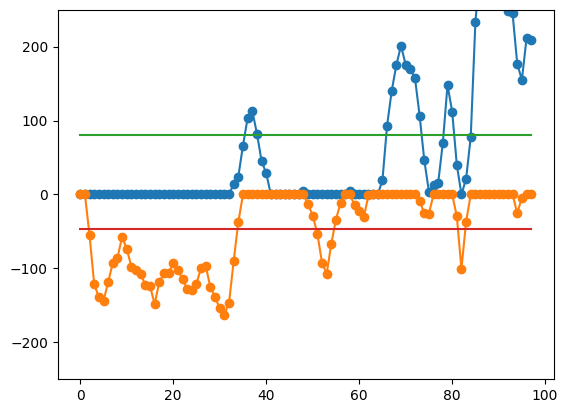

In [ ]:
plt.plot(df_sma5_fix['C_plus'],  '-o')
plt.plot(df_sma5_fix['C_min'],  '-o')
plt.plot(df_sma5_fix['UCL'], "-")
plt.plot(df_sma5_fix['LCL'], "-")
plt.ylim([-250,250])

# Exercise in Soal

In [ ]:
x = [5.5358,-2.6183, 0.0130, 1.3543, 12.6980, 2.9007, 0.8985, 2.9240,
2.6663, -1.6710]
data = pd.DataFrame(x)
data = data.rename(columns = {0 : 'error'})


In [ ]:
data.head()

,error
0,5.5358
1,-2.6183
2,0.0130
3,1.3543
4,12.6980


In [ ]:
T_1 = data['error'].mean()
#T_1 = 0
T_1

2.47013

In [ ]:
K_1 = 0.5*data['error'].std()
K_1

2.155298324807187

In [ ]:
UCL_1 = T_1 + 3*K_1
LCL_1 = T_1 - 3*K_1

In [ ]:
data['UCL'] = UCL_1
data['LCL'] = LCL_1
data

,error,UCL,LCL
0,5.5358,8.936025,-3.995765
1,-2.6183,8.936025,-3.995765
2,0.0130,8.936025,-3.995765
3,1.3543,8.936025,-3.995765
4,12.6980,8.936025,-3.995765
5,2.9007,8.936025,-3.995765
6,0.8985,8.936025,-3.995765
7,2.9240,8.936025,-3.995765
8,2.6663,8.936025,-3.995765
9,-1.6710,8.936025,-3.995765


In [ ]:
data['C_plus'] = 0
data['C_min'] = 0
data['C'] = 0

In [ ]:
for i in range(1,10):
  data['C_plus'][i] = max(0, data['error'][i] - (T_1+K_1) +  data['C_plus'][i-1])
  data['C_min'][i] = min(0, data['error'][i] - (T_1-K_1) +  data['C_min'][i-1])
  data['C'][i] = data['C_plus'][i] + data['C_min'][i]

<ipython-input-156-bc3ddf5bfb9c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['C_plus'][i] = max(0, data['error'][i] - (T_1+K_1) +  data['C_plus'][i-1])
<ipython-input-156-bc3ddf5bfb9c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['C_min'][i] = min(0, data['error'][i] - (T_1-K_1) +  data['C_min'][i-1])
<ipython-input-156-bc3ddf5bfb9c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['C'][i] = data['C_plus'][i] + 

(-20.0, 20.0)

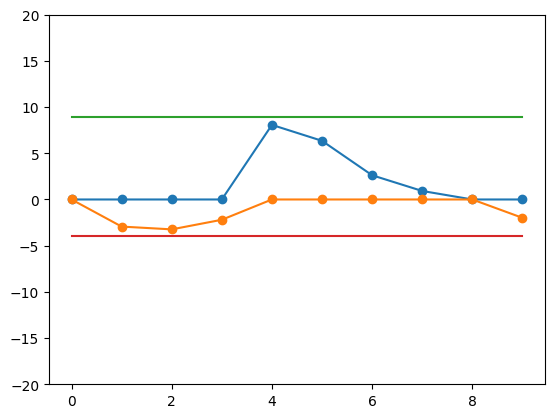

In [ ]:
plt.plot(data['C_plus'],  '-o')
plt.plot(data['C_min'],  '-o')
plt.plot(data['UCL'], "-")
plt.plot(data['LCL'], "-")
plt.ylim([-20,20])